In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [ ]:
!pip install kaggle

In [ ]:
anime = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

print("Anime dataset shape: ", anime.shape)
print("Ratings dataset shape: ", ratings.shape)

Anime dataset shape:  (12294, 7)
Ratings dataset shape:  (84069, 3)


In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [ ]:
anime['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [ ]:
anime['episodes'] = anime['episodes'].replace('Unknown', np.nan).astype(float)

In [ ]:

print("Unique users in ratings:", ratings['user_id'].nunique())
print("Unique anime rated:", ratings['anime_id'].nunique())

Unique users in ratings: 869
Unique anime rated: 4995


ratings = -1 --> which is not rated by the used

In [ ]:
ratings_cleaned = ratings[ratings['rating'] != -1]
print("Original ratings:", len(ratings))
print("Cleaned ratings (removed -1):", len(ratings_cleaned))

Original ratings: 84069
Cleaned ratings (removed -1): 68011


Text(0, 0.5, 'Frequency')

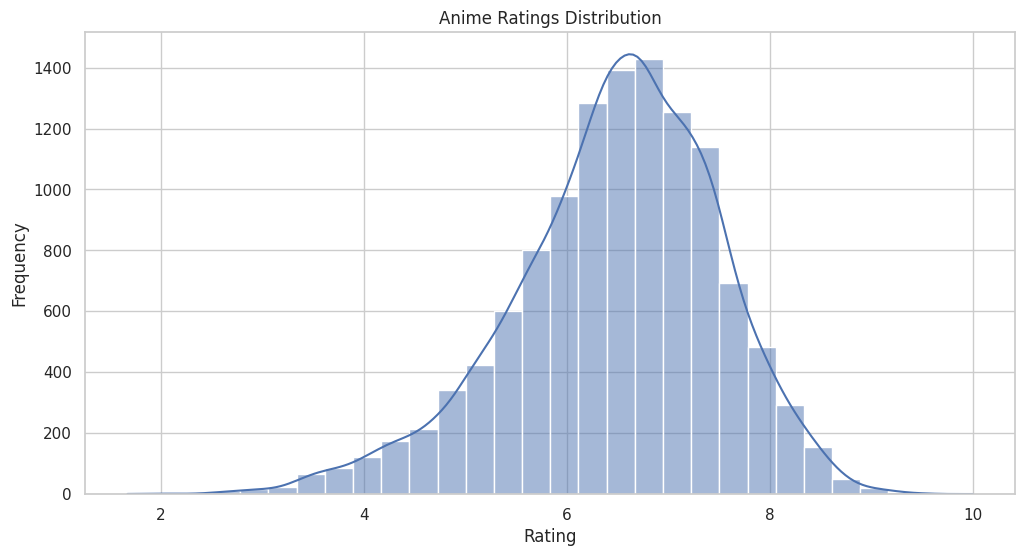

In [ ]:
sns.histplot(anime['rating'].dropna(), bins=30, kde=True)
plt.title("Anime Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")

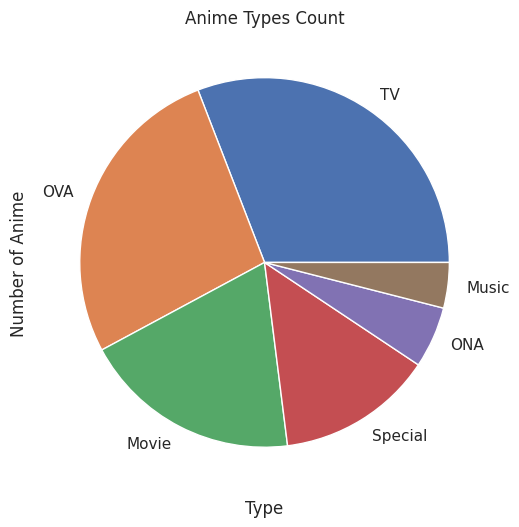

In [ ]:
anime['type'].value_counts().plot(kind='pie')
plt.title("Anime Types Count")
plt.xlabel("Type")
plt.ylabel("Number of Anime")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3357920006.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(15), x='Count', y='Genre', palette='viridis')


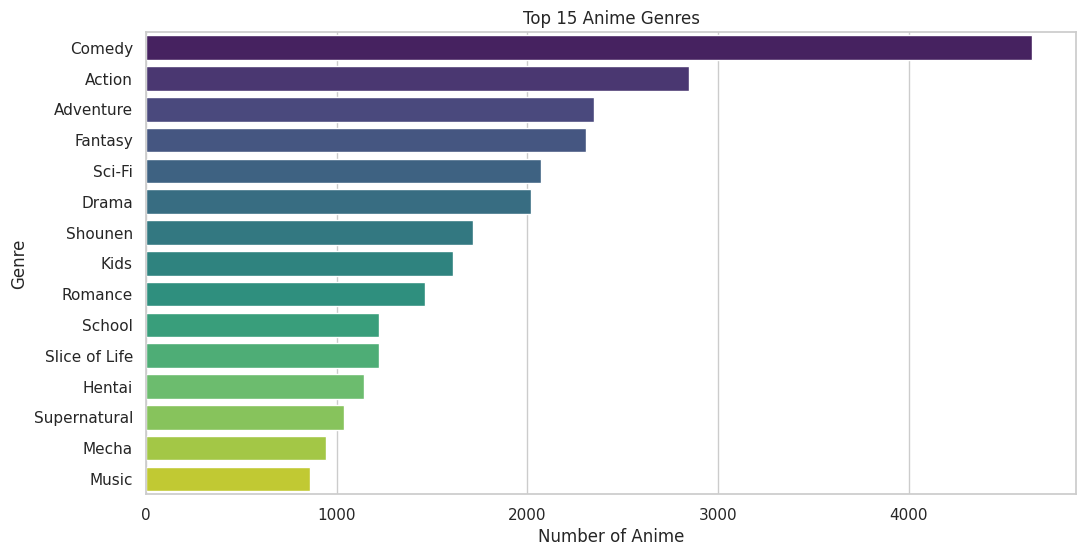

In [ ]:
from collections import Counter

genre_count = Counter()
for genres in anime['genre'].dropna():
    for g in genres.split(', '):
        genre_count[g] += 1

#Conver to dataframe
genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

#Plot
sns.barplot(data=genre_df.head(15), x='Count', y='Genre', palette='viridis')
plt.title("Top 15 Anime Genres")
plt.xlabel("Number of Anime")
plt.ylabel("Genre")
plt.show()


/tmp/ipython-input-1224821437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_members, x='members', y='name', palette='rocket')


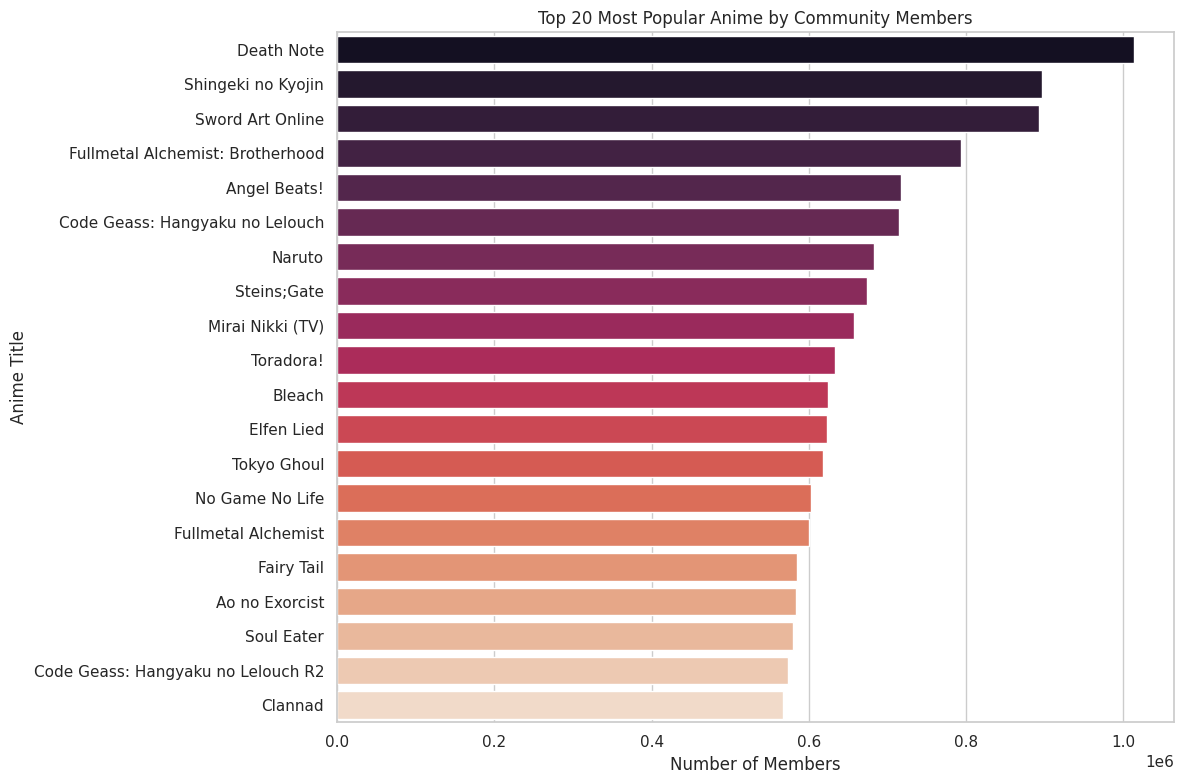

In [ ]:
# Drop missing values in 'members' and sort by size
top_members = anime[['name', 'members']].dropna().sort_values(by='members', ascending=False).head(20)

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_members, x='members', y='name', palette='rocket')

plt.title('Top 20 Most Popular Anime by Community Members')
plt.xlabel('Number of Members')
plt.ylabel('Anime Title')
plt.tight_layout()
plt.show()

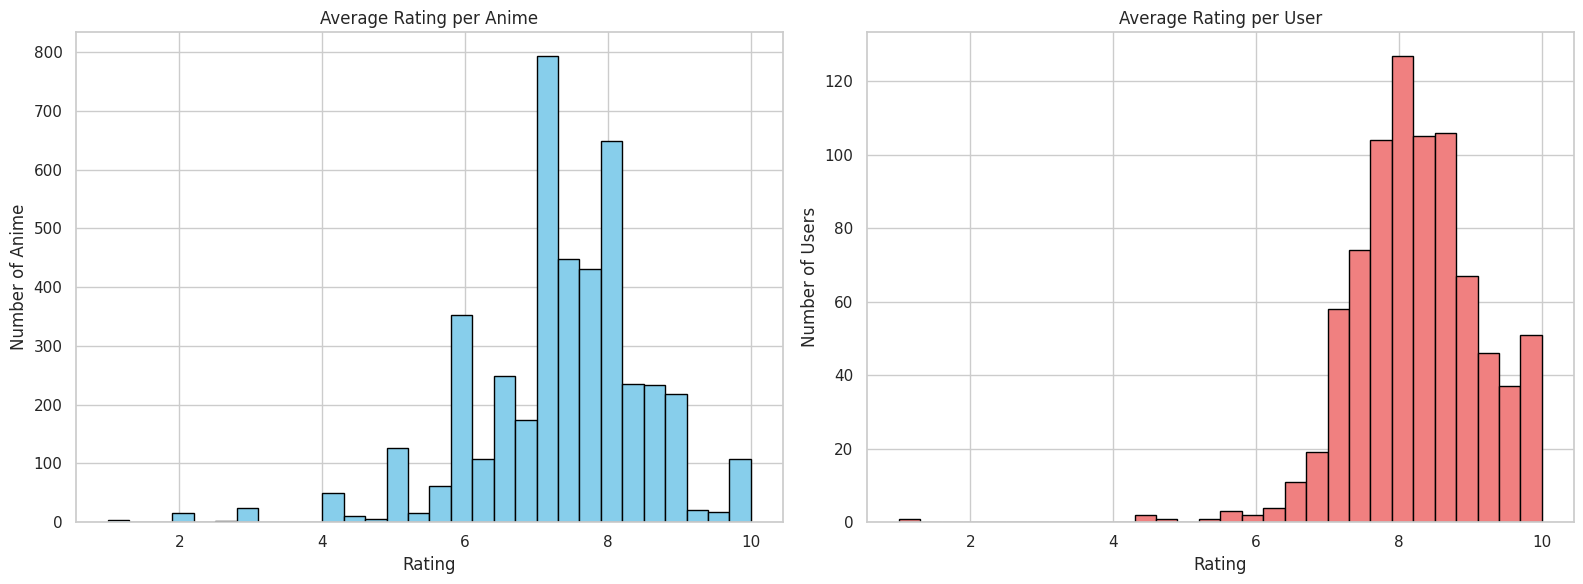

In [ ]:
# Compute average rating per anime
anime_avg_ratings = ratings_cleaned.groupby('anime_id')['rating'].mean()

# Compute average rating per user
user_avg_ratings = ratings_cleaned.groupby('user_id')['rating'].mean()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Anime avg ratings
axes[0].hist(anime_avg_ratings, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Average Rating per Anime')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Anime')

# User avg ratings
axes[1].hist(user_avg_ratings, bins=30, color='lightcoral', edgecolor='black')
axes[1].set_title('Average Rating per User')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Number of Users')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2468122970.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated_anime, x='num_ratings', y='name', palette='crest')


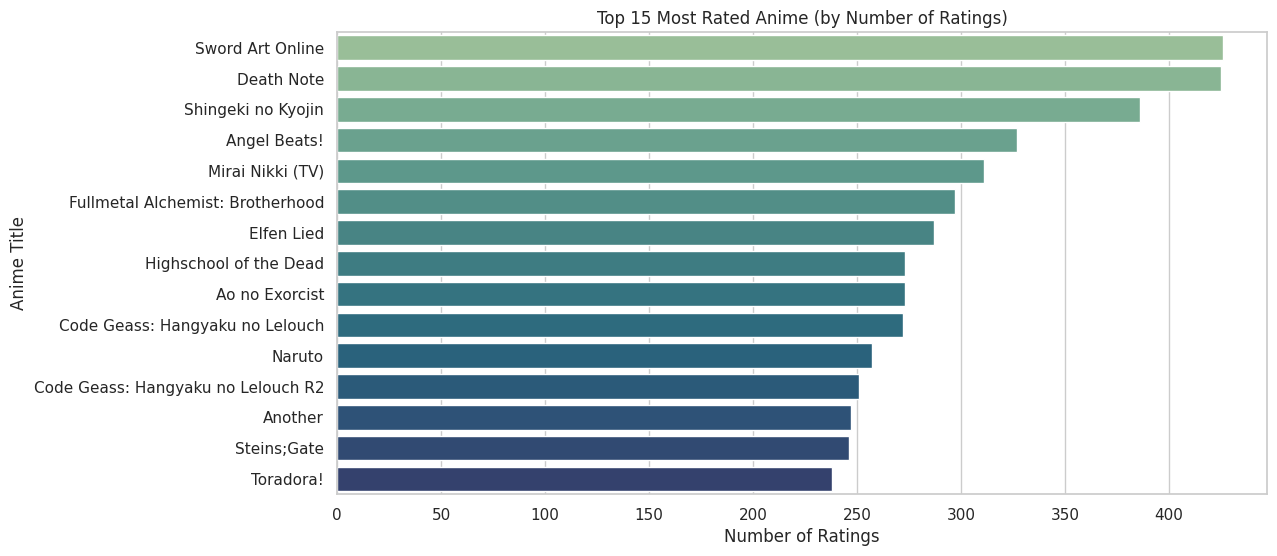

In [ ]:
# Count number of ratings per anime
anime_rating_counts = ratings_cleaned['anime_id'].value_counts().reset_index()
anime_rating_counts.columns = ['anime_id', 'num_ratings']

# Merge with anime names
top_rated_anime = pd.merge(anime_rating_counts, anime[['anime_id', 'name']], on='anime_id')

# Sort and take top 15
top_rated_anime = top_rated_anime.head(15)

# Show table
top_rated_anime[['name', 'num_ratings']]

sns.barplot(data=top_rated_anime, x='num_ratings', y='name', palette='crest')
plt.title('Top 15 Most Rated Anime (by Number of Ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Anime Title')
plt.show()

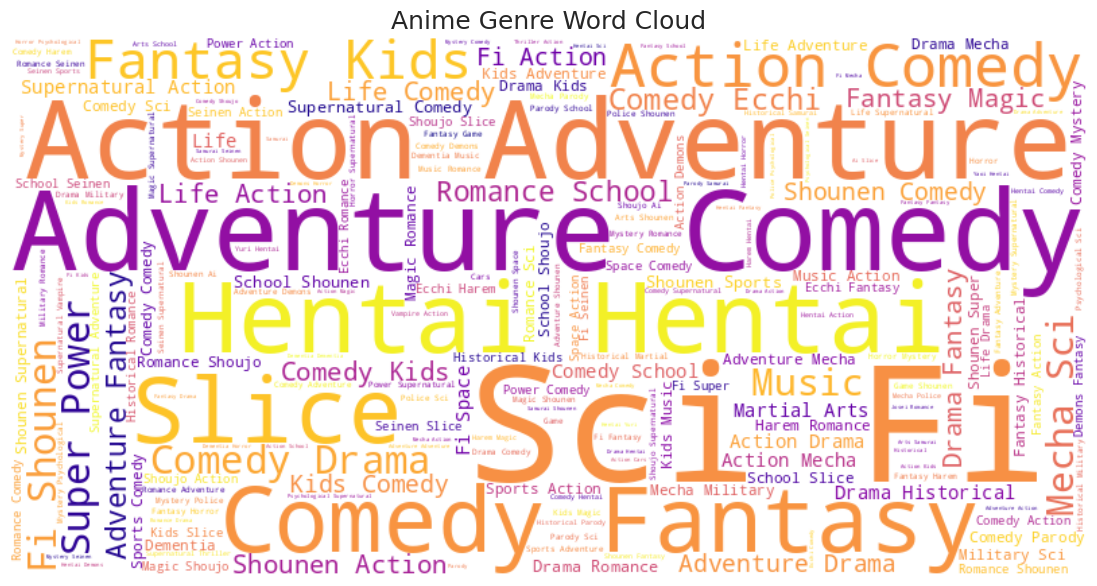

In [ ]:
from wordcloud import WordCloud

# Drop missing genres
genre_data = anime['genre'].dropna()

# Combine all genres into one string
all_genres = ','.join(genre_data)

# Split and join again to ensure spaces between words
genre_words = ' '.join(all_genres.replace(',', ' ').split())

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='plasma'
).generate(genre_words)

# Plot
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Anime Genre Word Cloud', fontsize=18)
plt.show()

# Recommendation System

In [ ]:
# Count number of ratings per anime
anime_rating_count = ratings_cleaned.groupby('anime_id')['rating'].count().reset_index()
anime_rating_count.columns = ['anime_id', 'num_ratings']

# Merge with anime titles
popularity_df = anime_rating_count.merge(anime[['anime_id', 'name']], on='anime_id')

# Top 10 most rated anime
top_popular = popularity_df.sort_values(by='num_ratings', ascending=False).head(10)

# Display
print(top_popular[['name', 'num_ratings']])

                                  name  num_ratings
2821                  Sword Art Online          426
988                         Death Note          425
3238                Shingeki no Kyojin          386
2104                      Angel Beats!          327
2674                  Mirai Nikki (TV)          311
1888  Fullmetal Alchemist: Brotherhood          297
181                         Elfen Lied          287
2525                    Ao no Exorcist          273
2297            Highschool of the Dead          273
1011   Code Geass: Hangyaku no Lelouch          272


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# to calculate cosine similarity between two vectors efficiently
from sklearn.metrics.pairwise import linear_kernel

# Fill NaN genres with empty string
anime['genre'] = anime['genre'].fillna('')

# TF-IDF Vectorizer on genre
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime['genre'])

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Anime name to index mapping
anime_indices = pd.Series(anime.index, index=anime['name']).drop_duplicates()

# Recommender function
def recommend_content(title, top_n=10):
    idx = anime_indices.get(title)
    if idx is None:
        print("Anime not found!")
        return
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    anime_indices_top = [i[0] for i in sim_scores]
    return anime['name'].iloc[anime_indices_top]

In [ ]:
# Example
recommend_content("One Piece")

,name
231,One Piece: Episode of Merry - Mou Hitori no Na...
241,One Piece: Episode of Nami - Koukaishi no Nami...
896,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...
352,One Piece Film: Strong World Episode 0
753,One Piece: Episode of Luffy - Hand Island no B...
941,One Piece Movie 4: Dead End no Bouken
1171,One Piece Movie 9: Episode of Chopper Plus - F...
1576,One Piece: Adventure of Nebulandia
1793,One Piece Movie 5: Norowareta Seiken
1795,One Piece: Umi no Heso no Daibouken-hen


In [ ]:
# Example
recommend_content("Naruto")

,name
615,Naruto: Shippuuden
841,Naruto
1103,Boruto: Naruto the Movie - Naruto ga Hokage ni...
1343,Naruto x UT
1472,Naruto: Shippuuden Movie 4 - The Lost Tower
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2458,Naruto Shippuuden: Sunny Side Battle
2997,Naruto Soyokazeden Movie: Naruto to Mashin to ...
7628,Kyutai Panic Adventure!
784,Naruto: Shippuuden Movie 6 - Road to Ninja


In [ ]:
# Example
recommend_content("Bleach")

,name
946,Bleach Movie 4: Jigoku-hen
1131,Bleach Movie 3: Fade to Black - Kimi no Na wo ...
3288,Code:Breaker
1244,Yozakura Quartet: Tsuki ni Naku
1271,Yozakura Quartet: Hana no Uta
1694,Yozakura Quartet: Hoshi no Umi
3543,Yozakura Quartet
175,Katekyo Hitman Reborn!
611,K: Missing Kings
814,K: Return of Kings
